# Coupon Usage Analysis and Recommendations

## Table of cotent
1.[Setup](#Setup) \
2.[Predict coupon usage](#Predict-coupon-usage) \
3.[Check data anomalies and prepare data for Tableau analysis](#Check-data-anomalies-and-prepare-data-for-Tableau-analysis) \
4.[Correlation analysis for Tableau](#Correlation-analysis-for-Tableau) \
5.[Draw inferences from dataset without labels ](#Draw-inferences-from-dataset-without-labels) \
6.[Predict coupon usage](#Predict-coupon-usage)

## Setup and load data

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('L2_Week3.csv')
df.head()

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
0,1,43,management,married,no,yes,no,2,0,0
1,2,42,technician,divorced,no,yes,no,1,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0
3,4,28,management,single,no,yes,yes,2,0,0
4,5,42,technician,divorced,no,yes,no,5,0,0


## Check data anomalies and prepare data for [Tableau analysis]()

In [34]:
# data type is fine
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          25317 non-null  int64 
 1   age                         25317 non-null  int64 
 2   job                         25317 non-null  object
 3   marital                     25317 non-null  object
 4   default                     25317 non-null  object
 5   returned                    25317 non-null  object
 6   loan                        25317 non-null  object
 7   coupon_used_in_last6_month  25317 non-null  int64 
 8   coupon_used_in_last_month   25317 non-null  int64 
 9   coupon_ind                  25317 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [35]:
# Column: definition
# ID: id
# age: age
# job: job
# marital: marital
# default: loan default 
# returned: returned any good
# loan: use loan or direct payment
# coupon_used_in_last6_month: number of coupon_used_in_last6_month
# coupon_used_in_last_month: number of coupon_used_in_last_month
# coupon_ind: used coupon this time

In [36]:
# check unique value
# chanage data type
display(df['job'].unique())
display(df['marital'].unique())
display(df['default'].unique())
display(df['returned'].unique())
display(df['loan'].unique())

array(['management', 'technician', 'admin.', 'services', 'retired',
       'student', 'blue-collar', 'unknown', 'entrepreneur', 'housemaid',
       'self-employed', 'unemployed'], dtype=object)

array(['married', 'divorced', 'single'], dtype=object)

array(['no', 'yes'], dtype=object)

array(['yes', 'no'], dtype=object)

array(['no', 'yes'], dtype=object)

In [37]:
df['job'].value_counts(normalize=True).apply(lambda x: str(np.round(100.0*x,2))+'%')

blue-collar      21.55%
management       20.92%
technician       16.75%
admin.           11.49%
services          9.25%
retired           5.03%
self-employed     3.49%
entrepreneur      3.38%
unemployed        2.77%
housemaid         2.62%
student           2.11%
unknown           0.64%
Name: job, dtype: object

In [38]:
# https://stackoverflow.com/questions/32589829/how-to-get-value-counts-for-multiple-columns-at-once-in-pandas-dataframe
# https://stackoverflow.com/questions/33346591/what-is-the-difference-between-size-and-count-in-pandas
# https://stackoverflow.com/questions/33271098/python-get-a-frequency-count-based-on-two-columns-variables-in-pandas-datafra/43814116

# df[['job','coupon_ind']].value_counts(normalize=True)
#     .value_counts(normalize=True)
# df.groupby(["job", "coupon_ind"]).size().reset_index(name="Time")
df.value_counts(["job", "coupon_ind"])

job            coupon_ind
blue-collar    0             5069
management     0             4560
technician     0             3760
admin.         0             2568
services       0             2131
retired        0              975
entrepreneur   0              789
self-employed  0              779
management     1              736
housemaid      0              605
unemployed     0              587
technician     1              481
student        0              390
blue-collar    1              387
admin.         1              341
retired        1              298
services       1              211
unknown        0              143
student        1              143
unemployed     1              114
self-employed  1              105
entrepreneur   1               67
housemaid      1               58
unknown        1               20
dtype: int64

In [39]:
df[df['age']<=0]

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind


In [40]:
df[((df['age']>=40) & (df['job']=='student'))]

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
3476,3477,42,student,married,no,no,no,6,0,0
12909,12910,47,student,single,no,no,no,8,0,0
14463,14464,48,student,single,no,no,no,1,0,0
15410,15411,41,student,single,no,yes,no,2,0,0
15950,15951,44,student,single,no,no,no,5,0,0
17168,17169,40,student,married,no,no,no,6,0,0
18570,18571,42,student,married,no,no,no,2,0,0
23058,23059,46,student,single,no,no,no,3,1,1
23127,23128,45,student,single,no,no,no,1,0,1


In [41]:
df[((df['age']<=22) & (df['marital']!='single'))]

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
60,61,21,blue-collar,married,yes,no,no,2,0,0
3396,3397,22,services,married,no,yes,no,3,0,0
3614,3615,22,blue-collar,married,no,yes,no,1,1,0
3706,3707,22,blue-collar,married,no,yes,yes,18,0,0
5352,5353,20,student,married,no,no,no,1,0,0
11544,11545,22,blue-collar,married,no,yes,no,3,0,0
16645,16646,20,blue-collar,married,no,yes,yes,3,0,0
16717,16718,22,blue-collar,married,no,yes,no,2,0,0
24299,24300,21,blue-collar,married,no,yes,yes,1,1,1


In [42]:
df[df['coupon_used_in_last6_month']<df['coupon_used_in_last_month']]

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind


In [233]:
df[((df['default']=='yes') & (df['loan']=='no'))].head()

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
60,61,21,blue-collar,married,yes,no,no,2,0,0
85,86,53,unemployed,married,yes,yes,no,3,0,0
202,203,42,housemaid,married,yes,no,no,1,0,0
251,252,32,unemployed,married,yes,yes,no,2,0,0
281,282,32,blue-collar,married,yes,yes,no,1,0,0


In [262]:
df_cleaned = df[~((df['default']=='yes') & (df['loan']=='no'))]

In [264]:
# https://thispointer.com/python-how-to-use-if-else-elif-in-lambda-functions/
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
    
df_cleaned.loc[:,'coupon_last_month_ind'] = df['coupon_used_in_last_month'].apply(lambda x: 1 if x>=1 else 0)
df_cleaned.loc[:,'coupon_last_6_month_ind'] = df['coupon_used_in_last6_month'].apply(lambda x: 1 if x>=1 else 0)

In [265]:
display(df_cleaned.head())
df_cleaned.to_csv('clean.csv',index=False)

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind,coupon_last_month_ind,coupon_last_6_month_ind
0,1,43,management,married,no,yes,no,2,0,0,0,1
1,2,42,technician,divorced,no,yes,no,1,1,0,1,1
2,3,47,admin.,married,no,yes,yes,2,0,0,0,1
3,4,28,management,single,no,yes,yes,2,0,0,0,1
4,5,42,technician,divorced,no,yes,no,5,0,0,0,1


In [266]:
df_cleaned.value_counts(['job'])

job          
blue-collar      5387
management       5243
technician       4198
admin.           2880
services         2319
retired          1267
self-employed     875
entrepreneur      837
unemployed        685
housemaid         659
student           533
unknown           163
dtype: int64

## Correlation analysis for Tableau

In [267]:
sum(df_cleaned['returned'].apply(lambda x: 1 if x=='yes' else 0))

13853

In [268]:
print("correlation between return column and age between 26 and 60")
def age_func(age):
    if age >= 26 and age <= 60:
        return 1
    else:
        return 0
df_cleaned['returned'].apply(lambda x: 1 if x=='yes' else 0).corr(df_cleaned['age'].apply(age_func))

correlation between return column and age between 26 and 60


0.1222442235237737

In [269]:
print("correlation between return column and job")
print("correlation between age between 26 and 60 column and job")
def job_func(x):
    if x=='retired' or x=='unemployed' or x=='student':
        return 1
    else:
        return 0
print(df_cleaned['job'].apply(job_func).corr(df_cleaned['age'].apply(age_func)))
print(df_cleaned['job'].apply(job_func).corr(df_cleaned['returned'].apply(lambda x: 1 if x=='yes' else 0)))

correlation between return column and job
correlation between age between 26 and 60 column and job
-0.3530316854578894
-0.1846706012576774


In [270]:
print("all customers have used in last 6 month")
df_cleaned[df_cleaned['coupon_last_6_month_ind']==0]

all customers have used in last 6 month


,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind,coupon_last_month_ind,coupon_last_6_month_ind


## Draw inferences from dataset without labels 

### Check Tableau analysis or Powerpoint at [GitHub](link)

### K-Prototypes analysis

In [271]:
from kmodes.kprototypes import KPrototypes

<AxesSubplot:>

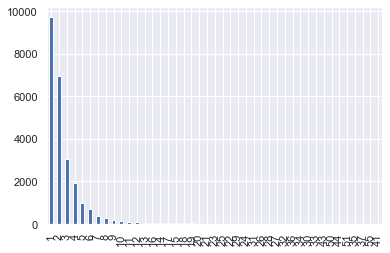

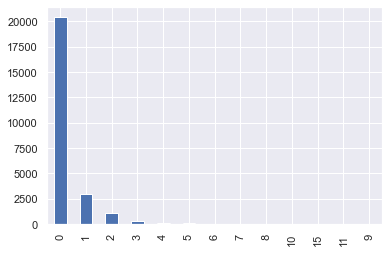

In [272]:
sns.set(font_scale=1)
fig, ax = plt.subplots()
df_cleaned['coupon_used_in_last6_month'].value_counts().plot(ax=ax, kind='bar')
fig, ax = plt.subplots()
df_cleaned['coupon_used_in_last_month'].value_counts().plot(ax=ax, kind='bar')

In [274]:
# can use PCA if too many columns
def age_func_cleaned(age):
    if age <= 25:
        return 1
    elif age > 25 and age <= 60:
        return 2
    else:
        return 3

df_cleaned.loc[:,'coupon_used_in_last6_month'] = df['coupon_used_in_last6_month'].apply(lambda x: 4 if x>=4 else x)
df_cleaned.loc[:,'coupon_used_in_last_month'] = df['coupon_used_in_last_month'].apply(lambda x: 7 if x>=7 else x)
df_cleaned.loc[:, 'age'] = df['age'].apply(age_func_cleaned)


In [277]:
df_cleaned_viz.drop([ \
        'ID','coupon_ind','coupon_last_month_ind','coupon_last_6_month_ind'], axis=1).head()

,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,label
0,1,4,1,0,1,0,2,0,0
1,1,9,0,0,1,0,1,1,0
2,1,0,1,0,1,1,2,0,0
3,1,4,2,0,1,1,2,0,0
4,1,9,0,0,1,0,4,0,2


In [278]:
# https://stackoverflow.com/questions/6181935/how-do-you-create-different-variable-names-while-in-a-loop
# https://medium.com/datadriveninvestor/k-prototype-in-clustering-mixed-attributes-e6907db91914
# https://www.youtube.com/watch?v=8eATPLDJ0NQ
# https://antonsruberts.github.io/kproto-audience/

kproto_object = {}
cluster_object = {}
cluster_num = {}
# cluster_centroids = {}
# cost = {}

for num_clusters in range(2,9):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', verbose=0, max_iter=20)
    clusters = kproto.fit_predict(df_cleaned.drop([ \
        'ID','coupon_ind','coupon_last_month_ind','coupon_last_6_month_ind'], axis=1), categorical=[0,1,2,3,4,5])
    kproto_object["{0}".format(num_clusters)] = kproto
    cluster_object["{0}".format(num_clusters)] = clusters
    cluster_num["{0}".format(num_clusters)] = num_clusters
#     cluster_centroids["{0}".format(x)] = kproto.cluster_centroids_
#     cost["{0}".format(x)] = kproto.cost_

    

Text(0, 0.5, 'Average center to points distance')

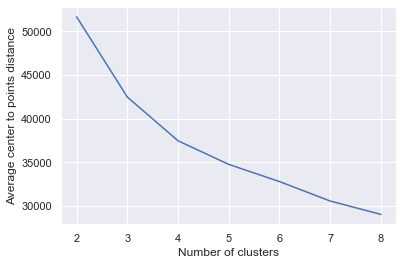

In [279]:
# fig, ax = plt.subplots()
# df_cleaned['coupon_used_in_last_month'].value_counts().plot(ax=ax, kind='bar')
plt.plot([i for i in list(cluster_num.values())], [i.cost_ for i in list(kproto_object.values())])
plt.xlabel(xlabel='Number of clusters')
plt.ylabel(ylabel='Average center to points distance')

### Elbow method tells us cluster could be 5

In [296]:
kproto_object['5'].cluster_centroids_

[array([[1.32918359, 0.23705936],
        [1.15746159, 0.12893197],
        [2.35      , 0.05096618],
        [2.75147929, 2.62011834],
        [3.79532451, 0.0340036 ]]),
 array([['2', 'blue-collar', 'married', 'no', 'yes', 'no'],
        ['2', 'management', 'single', 'no', 'no', 'no'],
        ['2', 'technician', 'married', 'no', 'no', 'no'],
        ['2', 'management', 'married', 'no', 'yes', 'no'],
        ['2', 'blue-collar', 'married', 'no', 'yes', 'no']], dtype='<U21')]

In [297]:
cluster_dict = []
for c in cluster_object['5']:
    cluster_dict.append(c)

In [298]:
df_cleaned_viz = df_cleaned.copy()

df_cleaned_viz.loc[:,'label'] = cluster_dict

df_cleaned_viz.loc[:,'job'] = df_cleaned['job'].astype('category').cat.codes
df_cleaned_viz.loc[:,'marital'] = df_cleaned['marital'].astype('category').cat.codes
df_cleaned_viz.loc[:,'default'] = df_cleaned['default'].astype('category').cat.codes
df_cleaned_viz.loc[:,'returned'] = df_cleaned['returned'].astype('category').cat.codes
df_cleaned_viz.loc[:,'loan'] = df_cleaned['loan'].astype('category').cat.codes



In [475]:
df_cleaned_viz['label'].value_counts(normalize=True)

/Users/ziyuanhan/opt/anaconda3/envs/base2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    0.304679
4    0.244231
1    0.218318
2    0.165296
3    0.067476
Name: label, dtype: float64

In [309]:
print(df_cleaned['job'].astype('category').cat.categories)
print(df_cleaned['marital'].astype('category').cat.categories)

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object')
Index(['divorced', 'married', 'single'], dtype='object')


In [310]:
# check table format
# df_cleaned_viz.drop(['ID','coupon_ind','coupon_last_month_ind','coupon_last_6_month_ind'], axis=1).head()

/Users/ziyuanhan/opt/anaconda3/envs/base2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


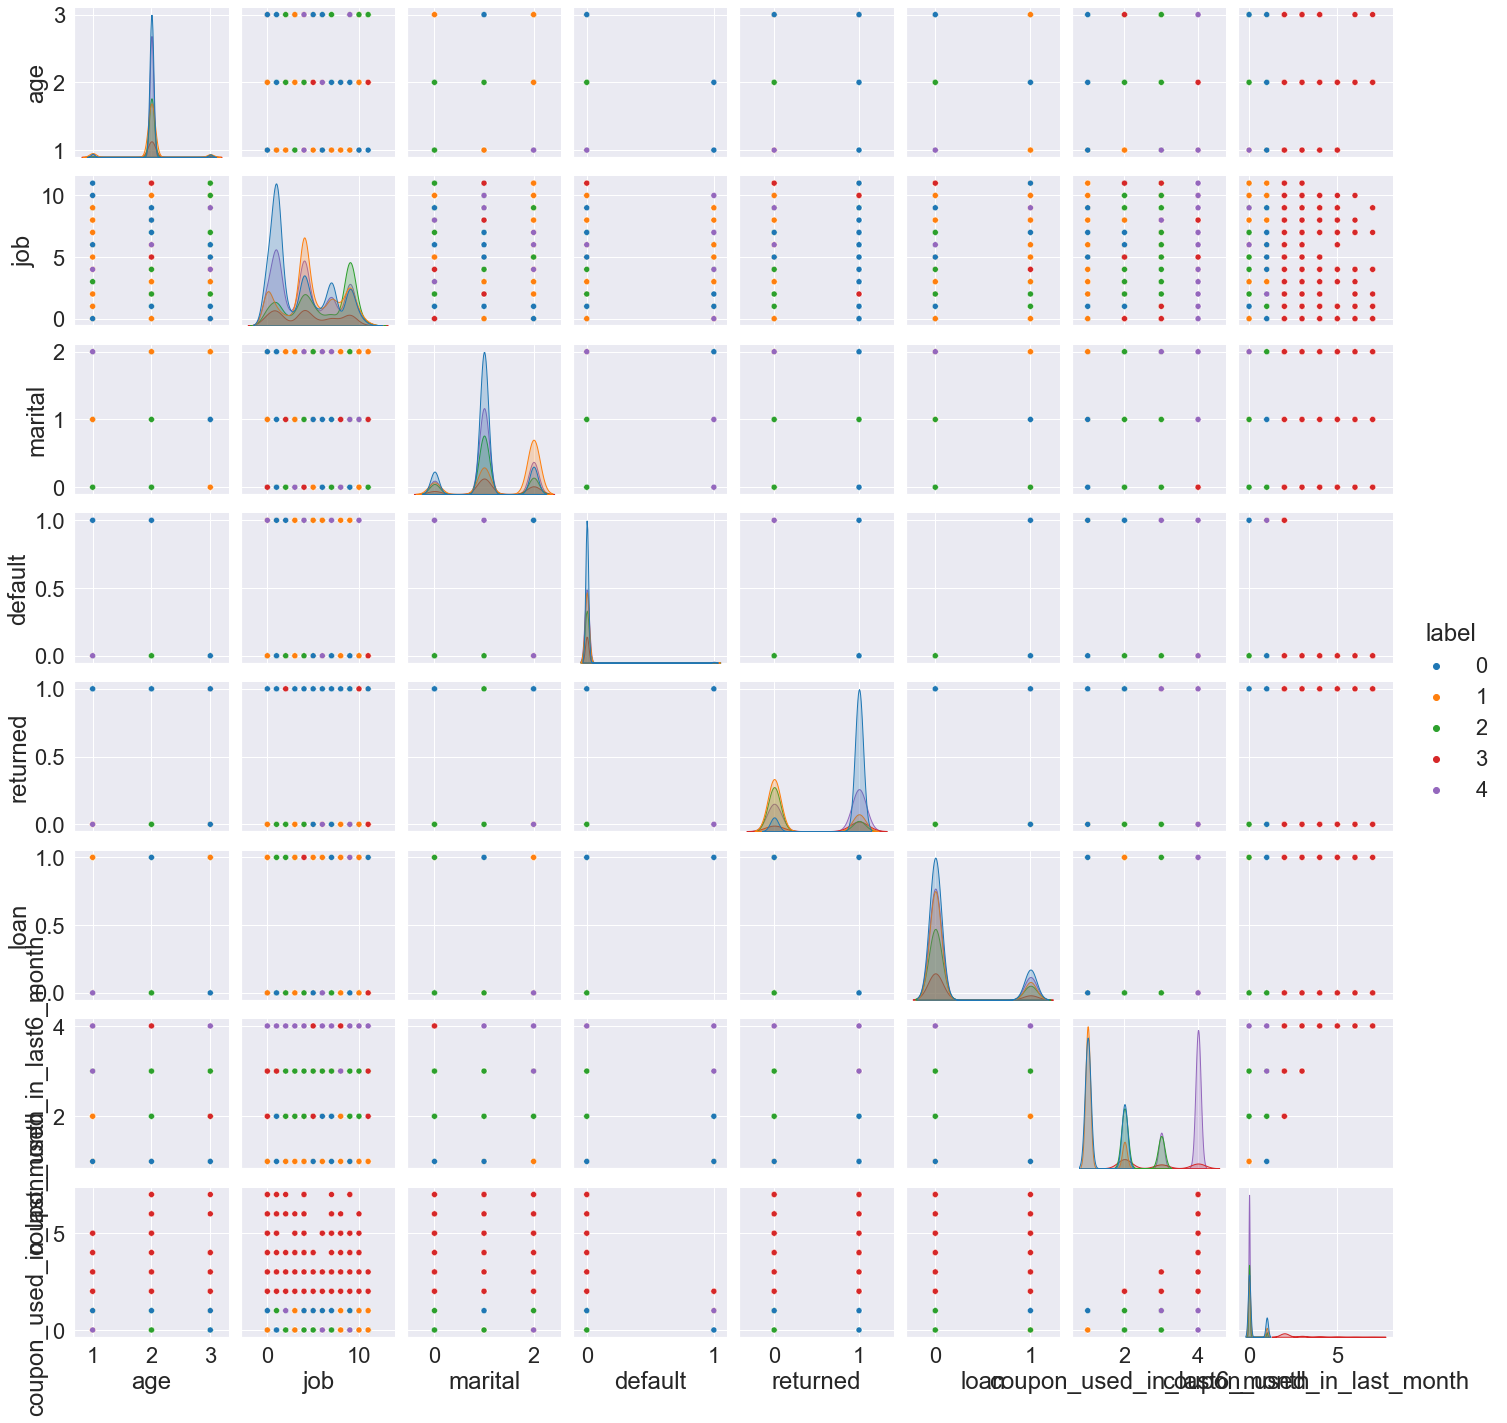

In [499]:
# https://www.kaggle.com/ellecf/visualizing-multidimensional-clusters
display_labels = ['age','job','marital','default','returned','loan','coupon_num_L6', 'coupon_num_l1']
sns.set(font_scale=2)
sns_plot = sns.pairplot(df_cleaned_viz.drop([ \
        'ID','coupon_ind','coupon_last_month_ind','coupon_last_6_month_ind'], axis=1),hue='label',palette='tab10')
sns_plot.savefig("output.png")

## Predict coupon usage

### set up metric - accuracy

* Assumption is that is no opportunity cost, therefore we don't lose anything if a coupon is not used.
* We don't want to miss any potential coupon customer
* metric should be recall, true positive/(true positive+false negative)
* But this gives baseline model 100% if we gave coupon to everyone 


* Maybe there is a opportunity cost to gave the wrong coupon, we assume it is the same as gave the right one.
* So we need accuracy

In [302]:
df_cleaned.drop(['ID','coupon_last_month_ind','coupon_last_6_month_ind','coupon_ind'], axis=1)

,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month
0,2,management,married,no,yes,no,2,0
1,2,technician,divorced,no,yes,no,1,1
2,2,admin.,married,no,yes,yes,2,0
3,2,management,single,no,yes,yes,2,0
4,2,technician,divorced,no,yes,no,4,0
...,...,...,...,...,...,...,...,...
25312,2,blue-collar,divorced,no,no,no,2,1
25313,2,services,married,no,no,yes,1,1
25314,2,blue-collar,divorced,no,yes,no,2,0
25315,2,entrepreneur,divorced,no,no,no,2,0


In [276]:
df_cleaned['age'].value_counts()

2    23620
1      752
3      674
Name: age, dtype: int64

In [256]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)

enc.categories_

[array([1]),
 array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array([1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5, 6, 7])]

In [403]:
X = df_cleaned.drop(['ID','coupon_last_month_ind','coupon_last_6_month_ind','coupon_ind'], axis=1).reset_index(drop=True)
y = df_cleaned[['coupon_ind']].reset_index(drop=True)


### baseline model (give everyone coupon)

In [477]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP, FP, TN, FN)

def plot

/Users/ziyuanhan/opt/anaconda3/envs/base2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [482]:
y['coupon_ind']

/Users/ziyuanhan/opt/anaconda3/envs/base2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        0
1        0
2        0
3        0
4        0
        ..
25041    1
25042    1
25043    1
25044    1
25045    1
Name: coupon_ind, Length: 25046, dtype: int64

accuracy is 0.8824962069791583


/Users/ziyuanhan/opt/anaconda3/envs/base2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


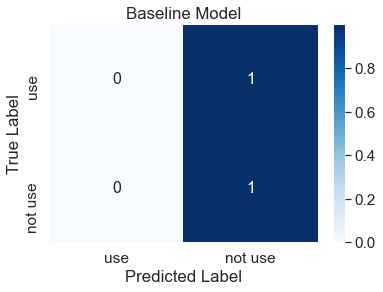

In [483]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

print("accuracy is {acc}".format(acc=accuracy_score(y, dummy_clf.predict(X))))

(TP, FP, TN, FN) = perf_measure(list(y['coupon_ind']),list(dummy_clf.predict(X)))

display_labels=np.array(['use','not use'])

array = [[TP/(TP+FN+1),FN/(TP+FN+1)],
         [FP/(FP+TN+1),TN/(FP+TN+1)]]

df_cm = pd.DataFrame(array, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap=plt.cm.Blues) \
.set(xticklabels=display_labels, yticklabels=display_labels, xlabel='Predicted Label', ylabel='True Label', title='Baseline Model')# font size
plt.show()


### Unsupervised K prototypes prediction (Only give coupon to cluster 4)

In [484]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

df_kproto_predict = df_cleaned_viz[['coupon_ind','label']]
df_kproto_predict.loc[:,'label'] = df_kproto_predict['label'].apply(lambda x: 1 if x==4 else 0)
print("accuracy is {acc}".format(acc = accuracy_score(df_kproto_predict['label'], df_kproto_predict['coupon_ind'])))

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP, FP, TN, FN)

(TP, FP, TN, FN) = perf_measure(list(df_kproto_predict['coupon_ind']), list(df_kproto_predict['label']))

accuracy is 0.6698874071708057


/Users/ziyuanhan/opt/anaconda3/envs/base2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/ziyuanhan/opt/anaconda3/envs/base2/lib/python3.8/site-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


/Users/ziyuanhan/opt/anaconda3/envs/base2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


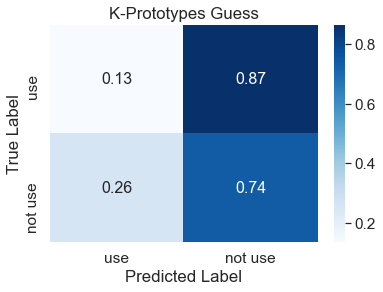

In [485]:
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
display_labels=np.array(['use','not use'])

array = [[TP/(TP+FN),FN/(TP+FN)],
         [FP/(FP+TN),TN/(FP+TN)]]

df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap=plt.cm.Blues) \
.set(xticklabels=display_labels, yticklabels=display_labels, xlabel='Predicted Label', ylabel='True Label', title='K-Prototypes Guess')# font size
plt.show()

### Boost & Logistic & Random Forest prediction

In [ ]:
# https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/
# https://stackoverflow.com/questions/15065833/imbalance-in-scikit-learn

In [411]:
X = df_cleaned.drop(['ID','coupon_last_month_ind','coupon_last_6_month_ind','coupon_ind'], axis=1).reset_index(drop=True)
y = df_cleaned[['coupon_ind']].reset_index(drop=True)
X.head(1)

,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month
0,2,management,married,no,yes,no,2,0


In [412]:
# https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

from sklearn.preprocessing import OneHotEncoder

enc_logistic = OneHotEncoder(handle_unknown='error',drop='first')
enc_tree = OneHotEncoder(handle_unknown='ignore')

X_numetric = X[['age','coupon_used_in_last6_month','coupon_used_in_last_month']]

X_catgorical_logistic = pd.DataFrame(enc_logistic.fit_transform(X[['job','marital','default','returned','loan']]).toarray())
X_catgorical_tree =  pd.DataFrame(enc_tree.fit_transform(X[['job','marital','default','returned','loan']]).toarray())

X_tree = X_numetric.join(X_catgorical_tree)
X_logistic = X_numetric.join(X_catgorical_logistic)

In [425]:
X_tree = X_numetric.join(X_catgorical_tree)
X_logistic = X_numetric.join(X_catgorical_logistic)

#### logistic Regression

/Users/ziyuanhan/opt/anaconda3/envs/base2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


logistic accuracy is 0.6628872564675823


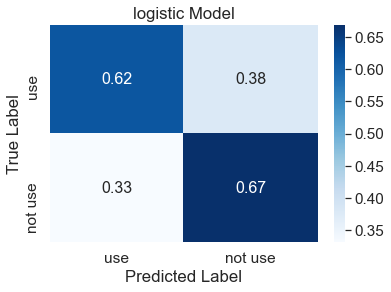

In [494]:
#  https://towardsdatascience.com/the-ultimate-guide-to-adaboost-random-forests-and-xgboost-7f9327061c4f
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, stratify=y, test_size=0.25, random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
lr = LogisticRegression(random_state=0, max_iter=300)

parameters_lr = \
{ \
    'penalty':('l1', 'l2', 'elasticnet') \
    ,'C':(0.1,0.5,1.0) \
    ,'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga') \
}
        
clf_lr = GridSearchCV(lr, parameters_lr, refit=True)
clf_lr.fit(X_train_res, y_train_res['coupon_ind'])

y_pred = clf_lr.predict(X_test)
print('logistic accuracy is {acc}'. \
      format(acc=accuracy_score(y_test['coupon_ind'], y_pred)))

(TP, FP, TN, FN) = perf_measure(list(y_test['coupon_ind']),list(y_pred))

display_labels=np.array(['use','not use'])

array = [[TP/(TP+FN+1),FN/(TP+FN+1)],
         [FP/(FP+TN+1),TN/(FP+TN+1)]]

df_cm = pd.DataFrame(array, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap=plt.cm.Blues) \
.set(xticklabels=display_labels, yticklabels=display_labels, xlabel='Predicted Label', ylabel='True Label', title='logistic Model')# font size
plt.show()

warnings.filterwarnings('always')

#### Random Forest

/Users/ziyuanhan/opt/anaconda3/envs/base2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


random forest accuracy is 0.7243692111146599


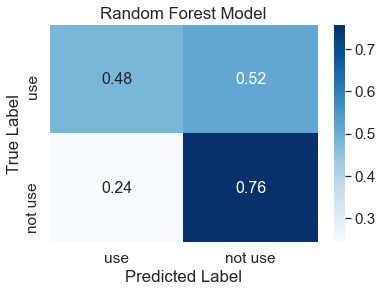

In [495]:
warnings.filterwarnings('ignore')
X_train, X_test, y_train, y_test = train_test_split(X_tree, y, stratify=y, test_size=0.25, random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
rf = RandomForestClassifier(random_state=0)

parameters_rf = \
{ \
    'n_estimators':(100, 200) \
    ,'criterion':('gini', 'entropy') \
    ,'min_samples_split':(2, 5, 10) \
    ,'min_samples_leaf':(1,2,5) \
    ,'max_features':('aut','sqrt','log2') \
}
        
clf_rf = GridSearchCV(rf, parameters_rf, refit=True)
clf_rf.fit(X_train_res, y_train_res['coupon_ind'])

y_pred = clf_rf.predict(X_test)
print('random forest accuracy is {acc}'. \
      format(acc=accuracy_score(y_test['coupon_ind'], y_pred)))

(TP, FP, TN, FN) = perf_measure(list(y_test['coupon_ind']),list(y_pred))

display_labels=np.array(['use','not use'])

array = [[TP/(TP+FN+1),FN/(TP+FN+1)],
         [FP/(FP+TN+1),TN/(FP+TN+1)]]

df_cm = pd.DataFrame(array, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap=plt.cm.Blues) \
.set(xticklabels=display_labels, yticklabels=display_labels, xlabel='Predicted Label', ylabel='True Label', title='Random Forest Model')# font size
plt.show()

warnings.filterwarnings('always')

#### Ada Boost

/Users/ziyuanhan/opt/anaconda3/envs/base2/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ada boost accuracy is 0.6740657936761418


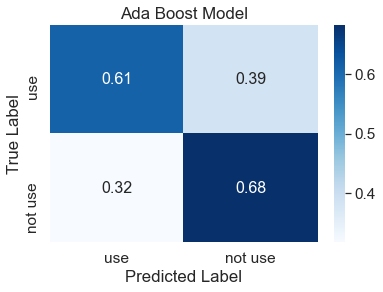

In [496]:
warnings.filterwarnings('ignore')
X_train, X_test, y_train, y_test = train_test_split(X_tree, y, stratify=y, test_size=0.25, random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
ada = AdaBoostClassifier(random_state=0)

parameters_ada = \
{ \
    'n_estimators':(25, 50) \
    ,'learning_rate':(0.5, 1, 2) \
}
        
# clf_ada = GridSearchCV(ada, parameters_ada, refit=True)
ada.fit(X_train_res, y_train_res['coupon_ind'])

y_pred = ada.predict(X_test)
print('ada boost accuracy is {acc}'. \
      format(acc=accuracy_score(y_test['coupon_ind'], y_pred)))

(TP, FP, TN, FN) = perf_measure(list(y_test['coupon_ind']),list(y_pred))

display_labels=np.array(['use','not use'])

array = [[TP/(TP+FN+1),FN/(TP+FN+1)],
         [FP/(FP+TN+1),TN/(FP+TN+1)]]

df_cm = pd.DataFrame(array, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap=plt.cm.Blues) \
.set(xticklabels=display_labels, yticklabels=display_labels, xlabel='Predicted Label', ylabel='True Label', title='Ada Boost Model')# font size
plt.show()

warnings.filterwarnings('always')

#### Model Summary

we can see none of the ml model is better than baseline model, we will need more data to classify users' probability of using coupon.